# Detecting Malicious URLs Using Machine Learning

In [1]:
pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 4.6 MB/s eta 0:00:00


In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tldextract
from urllib.parse import urlparse, unquote
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("dataset.csv")

df.head()

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


In [5]:
df.shape

(11430, 2)

In [6]:
df.isnull().sum()

,0
url,0
status,0


In [7]:
type_counts = df["status"].value_counts()
type_counts

,count
status,
legitimate,5715
phishing,5715


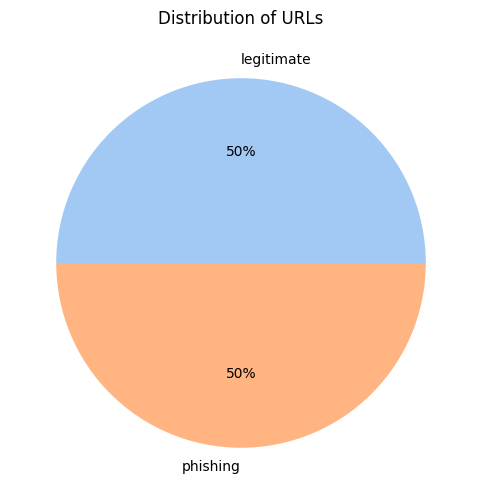

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, colors=sns.color_palette("pastel"), autopct='%.0f%%')
plt.title("Distribution of URLs")
plt.show()

In [8]:
df["url"] = df["url"].str.replace("www.", "")

In [9]:
df.head()

,url,status
0,http://crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate


In [10]:
type_to_category = {
    "legitimate": 1,
    "phishing": 0,
}

df["type"] = df["status"].map(type_to_category)

In [11]:
df.head()

,url,status,type
0,http://crestonwood.com/router.php,legitimate,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0
2,https://support-appleld.com.secureupdate.duila...,phishing,0
3,http://rgipt.ac.in,legitimate,1
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1


In [12]:
df["Url_length"] = df["url"].apply(len)

In [13]:
df.head()

,url,status,type,Url_length
0,http://crestonwood.com/router.php,legitimate,1,33
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126
3,http://rgipt.ac.in,legitimate,1,18
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51


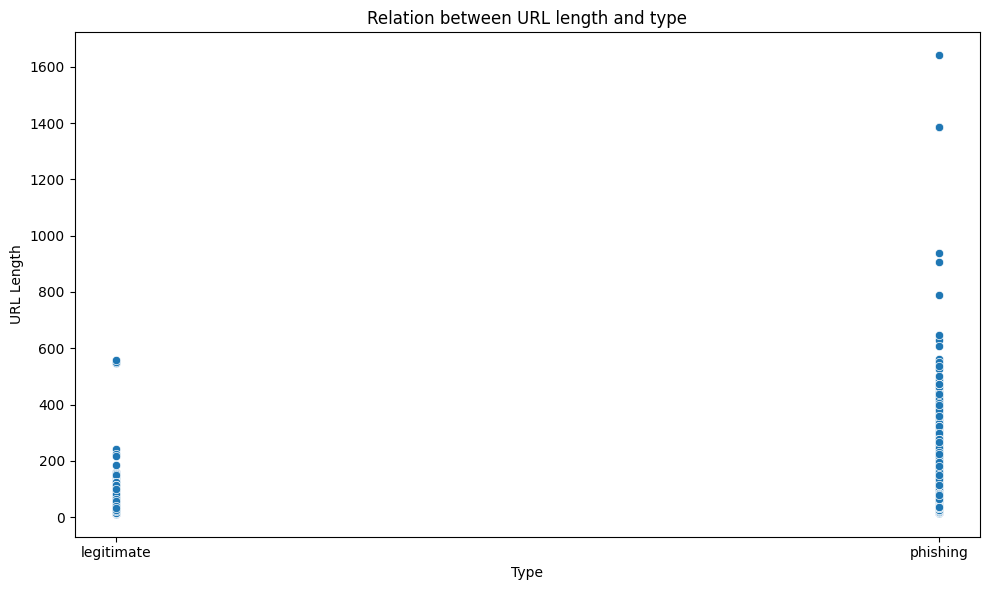

In [14]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="status", y="Url_length")
plt.title("Relation between URL length and type")
plt.xlabel("Type")
plt.ylabel("URL Length")
plt.tight_layout()
plt.show()

<ipython-input-15-0be0a08fcaca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='status', y='Url_length', palette="bright", errorbar=None)


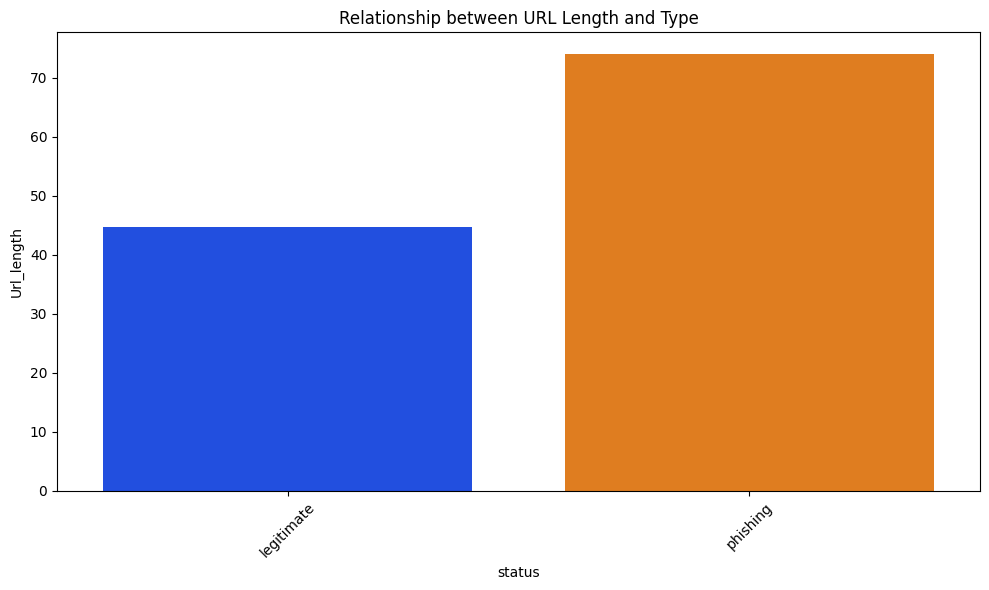

In [15]:
# REMOVE
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='status', y='Url_length', palette="bright", errorbar=None)
plt.title("Relationship between URL Length and Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
df.head()

,url,status,type,Url_length
0,http://crestonwood.com/router.php,legitimate,1,33
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126
3,http://rgipt.ac.in,legitimate,1,18
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51


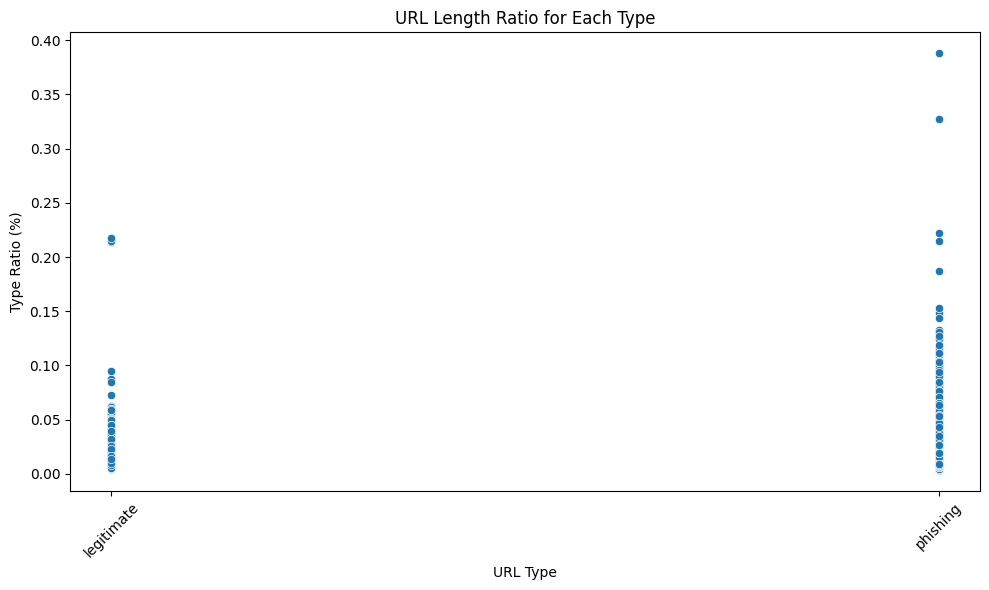

In [17]:
df["type_ratio"] = df.groupby("status")["Url_length"].transform(lambda x: x/x.sum()*100)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='status', y='type_ratio')
plt.title("URL Length Ratio for Each Type")
plt.ylabel("Type Ratio (%)")
plt.xlabel("URL Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
df.head()

,url,status,type,Url_length,type_ratio
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799
3,http://rgipt.ac.in,legitimate,1,18,0.007045
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960


In [19]:
def extract_domain(url):
    extracted = tldextract.extract(url)
    return f"{extracted.domain}.{extracted.suffix}"

df["domain"] = df["url"].apply(extract_domain)

In [20]:
df.head()

,url,status,type,Url_length,type_ratio,domain
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com


In [21]:
characters_to_count = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//','/']

def count_character_occurrences(url, character):
    return url.count(character)


for character in characters_to_count:
    df[f'{character}'] = df['url'].apply(lambda url: count_character_occurrences(url, character))

In [22]:
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,/
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,2,0,0,0,0,0,0,0,1,3
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,1,0,0,0,0,0,0,0,1,5
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,4,0,0,0,0,0,0,0,1,5
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,2,0,0,0,0,0,0,0,1,2
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,1,0,0,0,0,0,0,0,1,5


In [23]:
# Checking if Url have https
def has_https(url):
    return int("https" in url)

df['Has_HTTPS'] = df['url'].apply(has_https)

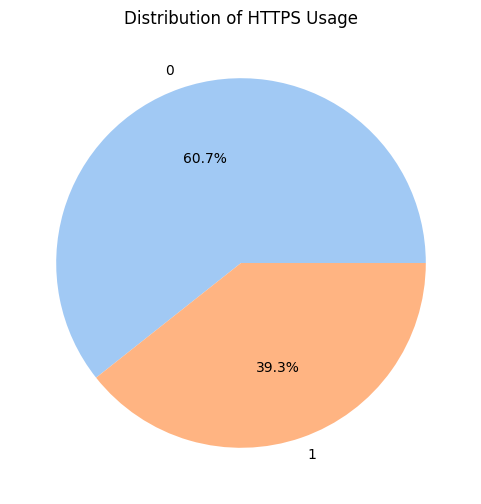

In [79]:
https_counts = df['Has_HTTPS'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(https_counts, labels=https_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of HTTPS Usage')
plt.show()

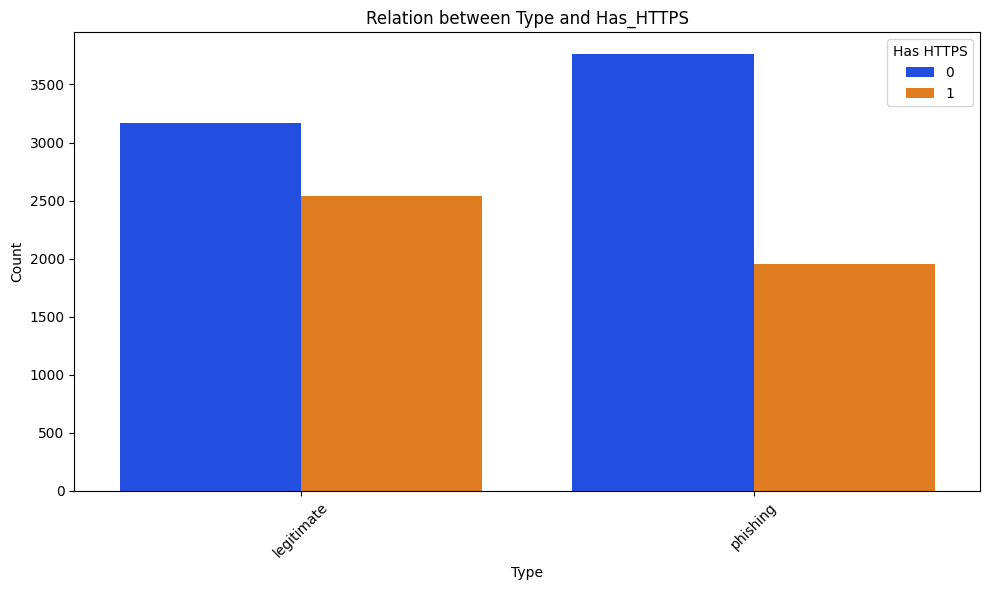

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status', hue='Has_HTTPS',palette="bright")
plt.title("Relation between Type and Has_HTTPS")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has HTTPS")
plt.tight_layout()
plt.show()

In [24]:
def count_digits(string):
    return sum(1 for char in string if char.isdigit())

def count_letters(string):
    return sum(1 for char in string if char.isalpha())

df['Digit_Count'] = df['url'].apply(count_digits)
df['Letter_Count'] = df['url'].apply(count_letters)

In [25]:
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,+,$,!,*,",",//,/,Has_HTTPS,Digit_Count,Letter_Count
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,0,0,0,0,1,3,0,0,27
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,0,0,0,0,0,1,5,0,17,53
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,0,0,0,0,0,1,5,1,19,88
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,0,0,0,0,1,2,0,0,13
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,0,0,0,0,1,5,0,0,42


In [26]:
shortening_pattern = r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|' \
                     r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|' \
                     r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|' \
                     r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|' \
                     r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|' \
                     r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|' \
                     r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|' \
                     r'tr\.im|link\.zip\.net'


def has_shortening_service(url):
    return int(re.search(shortening_pattern, url, flags=re.I) is not None)

df['Has_Shortening_Service'] = df['url'].apply(has_shortening_service)

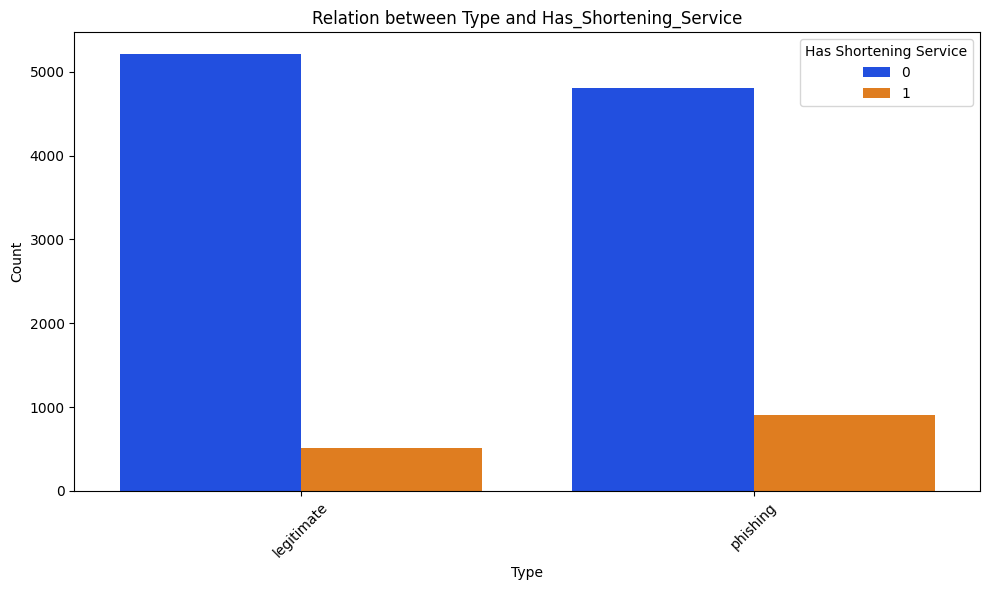

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status', hue='Has_Shortening_Service',palette='bright')
plt.title("Relation between Type and Has_Shortening_Service")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has Shortening Service")
plt.tight_layout()
plt.show()

In [28]:
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,$,!,*,",",//,/,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,0,0,0,1,3,0,0,27,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,0,0,0,0,1,5,0,17,53,0
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,0,0,0,0,1,5,1,19,88,0
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,0,0,0,1,2,0,0,13,0
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,0,0,0,1,5,0,0,42,0


In [29]:
ip_pattern = (
    r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
    r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'
    r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
    r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'
    r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)'
    r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
    r'([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
    r'((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)'
)


def has_ip_address(url):
    return int(re.search(ip_pattern, url, flags=re.I) is not None)

df['Has_IP_Address'] = df['url'].apply(has_ip_address)

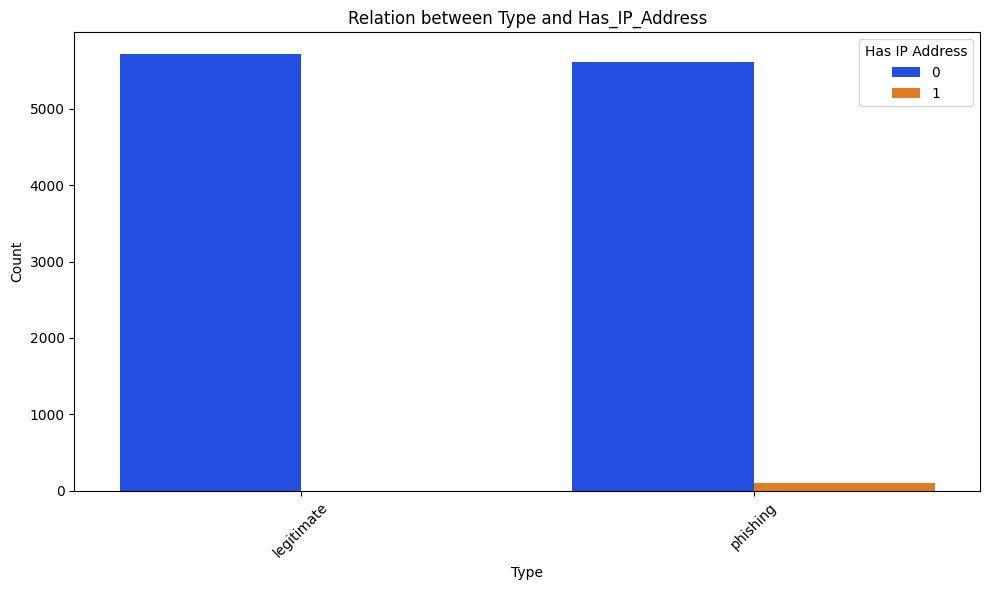

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status', hue='Has_IP_Address',palette='bright')
plt.title("Relation between Type and Has_IP_Address")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has IP Address")
plt.tight_layout()
plt.show()

In [31]:
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,!,*,",",//,/,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,0,0,1,3,0,0,27,0,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,0,0,0,1,5,0,17,53,0,0
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,0,0,0,1,5,1,19,88,0,0
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,0,0,1,2,0,0,13,0,0
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,0,0,1,5,0,0,42,0,0


In [32]:
def check_for_malicious_code(url):

    if re.search(r'javascript:', url):
        return 1

    if re.search(r'<\s*script', url, re.IGNORECASE) or re.search(r'on\w*=', url, re.IGNORECASE):
        return 1

    return 0


df['Has_javascript_Code'] = df['url'].apply(check_for_malicious_code)

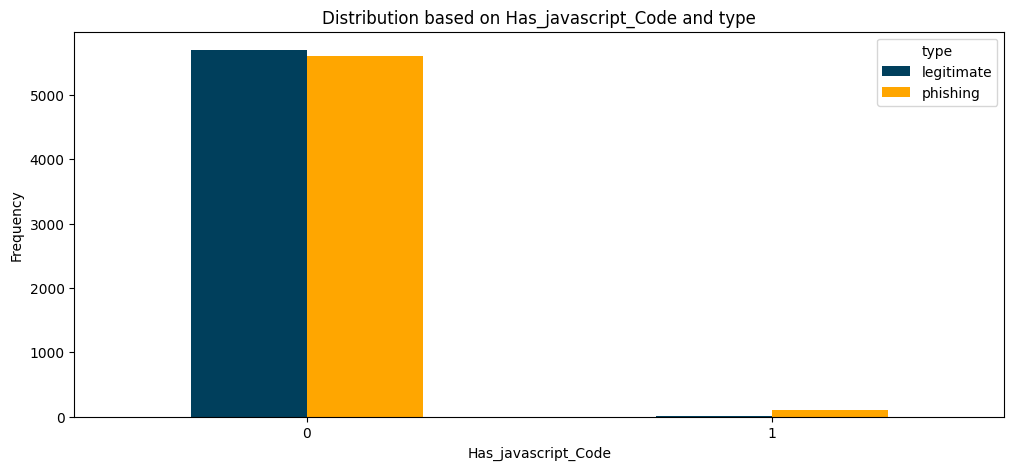

In [ ]:
pd.crosstab(df["Has_javascript_Code"], df["status"]).plot(kind="bar", figsize=(12, 5),
                                                           color=['#003f5c', '#ffa600', '#bc5090', '#ff6361'])
plt.title('Distribution based on Has_javascript_Code and type')
plt.xlabel('Has_javascript_Code')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(title="type")
plt.show()

In [33]:
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,*,",",//,/,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,0,1,3,0,0,27,0,0,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,0,0,1,5,0,17,53,0,0,0
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,0,0,1,5,1,19,88,0,0,0
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,0,1,2,0,0,13,0,0,0
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,0,1,5,0,0,42,0,0,0


In [34]:
def check_text_encoding(url):

    parsed_url = urlparse(url)

    text_part = parsed_url.path

    decoded_text = unquote(text_part)

    if decoded_text == text_part:
        return 0
    else:
        return 1

df['Has_Text_Encoding'] = df['url'].apply(check_text_encoding)

In [35]:
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,",",//,/,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,1,3,0,0,27,0,0,0,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,0,1,5,0,17,53,0,0,0,0
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,0,1,5,1,19,88,0,0,0,0
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,1,2,0,0,13,0,0,0,0
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,1,5,0,0,42,0,0,0,0


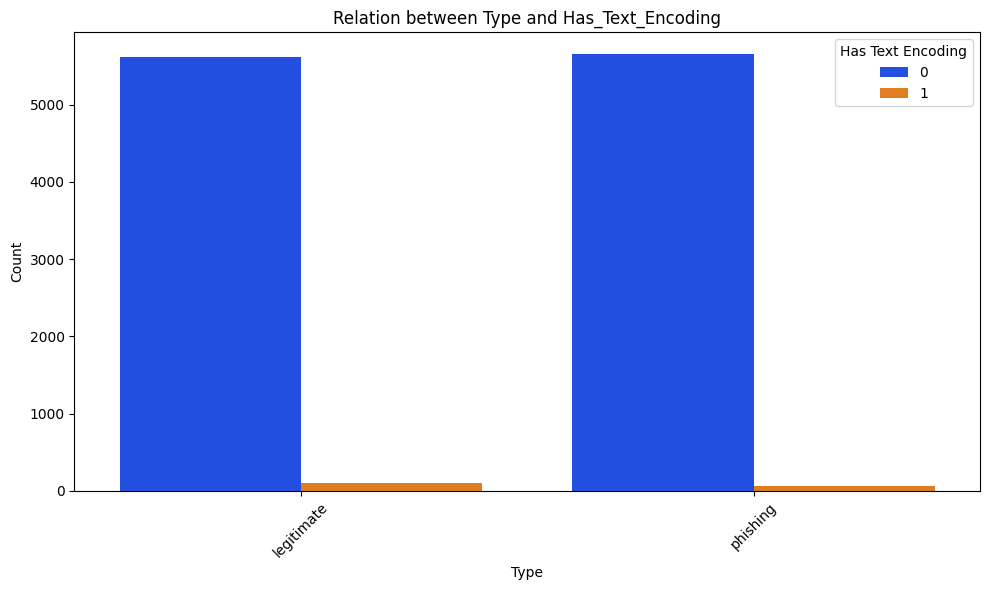

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status', hue='Has_Text_Encoding',palette='bright')
plt.title("Relation between Type and Has_Text_Encoding")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has Text Encoding")
plt.tight_layout()
plt.show()

In [36]:
df.isnull().sum()

,0
url,0
status,0
type,0
Url_length,0
type_ratio,0
domain,0
@,0
?,0
-,0
=,0


In [37]:
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,",",//,/,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,1,3,0,0,27,0,0,0,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,0,1,5,0,17,53,0,0,0,0
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,0,1,5,1,19,88,0,0,0,0
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,1,2,0,0,13,0,0,0,0
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,1,5,0,0,42,0,0,0,0


In [38]:
df["Domain_length"] = df["domain"].apply(len)
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,//,/,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding,Domain_length
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,1,3,0,0,27,0,0,0,0,15
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,1,5,0,17,53,0,0,0,0,23
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,1,5,1,19,88,0,0,0,0,17
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,1,2,0,0,13,0,0,0,0,11
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,1,5,0,0,42,0,0,0,0,11


In [39]:
def num_subdomains(string):
    return string.count('.')

df['num_subdomains'] = df['domain'].apply(num_subdomains)
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,/,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding,Domain_length,num_subdomains
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,3,0,0,27,0,0,0,0,15,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,5,0,17,53,0,0,0,0,23,1
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,5,1,19,88,0,0,0,0,17,1
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,2,0,0,13,0,0,0,0,11,2
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,5,0,0,42,0,0,0,0,11,1


In [40]:
suspicious_words = ['login', 'secure', 'update', 'confirm','invoice','post','important','required']
def contains_suspicious_words(string):
    for word in suspicious_words:
        if word in string.lower():
            return 1
    return 0

df['contains_suspicious_words'] = df['url'].apply(contains_suspicious_words)
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding,Domain_length,num_subdomains,contains_suspicious_words
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,0,27,0,0,0,0,15,1,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,0,17,53,0,0,0,0,23,1,0
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,1,19,88,0,0,0,0,17,1,1
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,0,13,0,0,0,0,11,2,0
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,0,42,0,0,0,0,11,1,0


In [41]:
import math
from collections import Counter

def calculate_entropy(url):
    # Calculate the frequency of each character in the URL
    char_counts = Counter(url)
    # Calculate the total number of characters in the URL
    total_chars = len(url)
    # Calculate the entropy
    entropy = -sum((count / total_chars) * math.log2(count / total_chars) for count in char_counts.values())
    return entropy

df['URL_entropy'] = df['url'].apply(calculate_entropy)

df.head()


,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding,Domain_length,num_subdomains,contains_suspicious_words,URL_entropy
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,27,0,0,0,0,15,1,0,3.775476
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,17,53,0,0,0,0,23,1,0,4.419864
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,19,88,0,0,0,0,17,1,1,4.753412
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,13,0,0,0,0,11,2,0,3.461320
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,42,0,0,0,0,11,1,0,4.052752


In [ ]:
pip install python-whois

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
import whois
from datetime import datetime

def get_domain_age(url):
    try:
        domain_info = whois.whois(url)
        creation_date = domain_info.creation_date
        if isinstance(creation_date, list):
            creation_date = creation_date[0]
        age = (datetime.now() - creation_date).days if creation_date else None
    except Exception as e:
        print(f"Error processing URL: {url}")
        age = None
    return age

df['domain_age'] = df['domain'].apply(get_domain_age)
print(df)


Error processing URL: kenaidanceta.com
Error processing URL: swallowthisbitchpics.com
Error processing URL: brilliantbokeh.com
Error processing URL: careervidi.com
Error processing URL: nakamistrad.com
Error processing URL: baghira-wupperwolf.de


2024-07-27 09:57:20,757 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 09:57:20,803 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: skecherstanio.pl


2024-07-27 09:57:47,653 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: goepsa.com
Error processing URL: m9e4.com
Error processing URL: magalu-crediarioluiza.com
Error processing URL: zxc301.com
Error processing URL: naturealtree.com
Error processing URL: strykertoyhaulers.com


2024-07-27 09:59:05,786 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: cns-international2.com
Error processing URL: mauy.org


2024-07-27 09:59:40,997 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: look.com.ua
Error processing URL: justlookapp.com


2024-07-27 09:59:58,357 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 10:00:10,776 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: mereliverystables.com
Error processing URL: taxclaim08.com
Error processing URL: instagramnotice-security.com


2024-07-27 10:00:18,330 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: reippl.com


2024-07-27 10:00:21,903 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 10:00:22,992 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 10:00:30,356 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: vktheme.ru


2024-07-27 10:01:04,233 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: chemsbury.net
Error processing URL: baltic-dragon.ru


2024-07-27 10:01:35,247 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 10:01:37,401 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: phoenixlocksmith-az.com
Error processing URL: madsuka.com


2024-07-27 10:01:46,902 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: arquitecturamanuelmojica.com
Error processing URL: mocabonitabresil.com
Error processing URL: wwwxjj9988.com
Error processing URL: iptvlinkusa.com
Error processing URL: sgpermata.com


2024-07-27 10:02:44,713 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: eligulinsaat.com
Error processing URL: shellyfergusonphotography.com
Error processing URL: justlookapp.com
Error processing URL: jangansedihdandiam.com
Error processing URL: .nhs.uk
Error processing URL: life4news.ru
Error processing URL: slashoffers.de
Error processing URL: patriothost.net
Error processing URL: cocktailcontent.com
Error processing URL: mybankicbc.com
Error processing URL: de-tailor.com
Error processing URL: aquiferchidet.com
Error processing URL: justlookapp.com
Error processing URL: ddrevent.com


2024-07-27 10:05:00,911 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: dungtraktakdungdung.com


2024-07-27 10:05:10,599 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: stefaninicompany.net
Error processing URL: mocabonitabresil.com
Error processing URL: applmanager.com
Error processing URL: teploteka.com.ua
Error processing URL: carmo-ekb.kz
Error processing URL: motorzona.ru
Error processing URL: urb7.com
Error processing URL: babywantsbling.com
Error processing URL: bayoucitybadges.org


2024-07-27 10:07:05,850 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: byefree.org
Error processing URL: eyrehead.com
Error processing URL: scimarec.net
Error processing URL: aziendaleone.com
Error processing URL: holl-vips.com
Error processing URL: lakatosfoundation.com
Error processing URL: mprestige.com.ua
Error processing URL: alcionenovios.com
Error processing URL: designergazi.com
Error processing URL: joshtobye.com


2024-07-27 10:08:01,550 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 10:08:03,573 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: promohinotruck.com
Error processing URL: impotspublicservice.com
Error processing URL: madsuka.com
Error processing URL: abm.edu.ar
Error processing URL: iscbankofamerica.net
Error processing URL: kenaidanceta.com
Error processing URL: applmanager.com
Error processing URL: keramikadecor.com.ua
Error processing URL: holdwiki.com


2024-07-27 10:09:36,190 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 10:09:50,717 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 10:09:50,992 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: hi-riserofing.com
Error processing URL: vokrugsveta.ua
Error processing URL: pollsbee.com
Error processing URL: 10sosh.ru
Error processing URL: ame-smart-ultra-digital.com
Error processing URL: midyatmimaritas.com
Error processing URL: analyticscluster.com
Error processing URL: fndsdaytings.com
Error processing URL: nixtechnix.com
Error processing URL: id128-sync.com
Error processing URL: thisdayjune.com
Error processing URL: politicallimit.com


2024-07-27 10:11:39,921 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: presentes-promocoes-premier.com
Error processing URL: ham9222.com
Error processing URL: kenaidanceta.com
Error processing URL: multiservicioswebther.com


2024-07-27 10:12:23,319 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: riblanda.com
Error processing URL: m-aut.ru
Error processing URL: snuiret.com
Error processing URL: heroeslounge.gg


2024-07-27 10:13:03,013 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: ezoomeranggrow.com
Error processing URL: printexx.ru
Error processing URL: accountinfo-ee.com
Error processing URL: justlookapp.com
Error processing URL: stolizaparketa.ru
Error processing URL: posicionweb.net
Error processing URL: theloveonherproject.org
Error processing URL: lg-led-culture.com
Error processing URL: liraon.com
Error processing URL: stolizaparketa.ru
Error processing URL: bradbeckstead.com
Error processing URL: agrotube.ru
Error processing URL: mfmazetomatrix.com
Error processing URL: compraycambia.com


2024-07-27 10:15:12,207 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: yasminka.cz


2024-07-27 10:15:15,754 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: threenetworksystems.com
Error processing URL: bajer.info.pl


2024-07-27 10:15:59,139 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 113] No route to host
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 113] No route to host


Error processing URL: shalom-colombia.com
Error processing URL: umnie-deti.com.ua


2024-07-27 10:16:44,355 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: beyondstateofmind.com
Error processing URL: aieuv.cn
Error processing URL: myglobalchild.com
Error processing URL: strykertoyhaulers.com
Error processing URL: mondaymagi.com
Error processing URL: presentes-promocoes-premier.com
Error processing URL: alsolimangroup.com
Error processing URL: g8consultores.com.ar


2024-07-27 10:17:36,396 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: ee-paymentalert.com
Error processing URL: sanjoaquinvalleybrewfest.com
Error processing URL: netaugusta.com
Error processing URL: genital-herpes-facts.com
Error processing URL: centurionallsuite.co.za
Error processing URL: ivanidzakovic.com
Error processing URL: emv9269.com
Error processing URL: nabihdent.com
Error processing URL: donplitka.in.ua
Error processing URL: yovcxm.com
Error processing URL: stolizaparketa.ru
Error processing URL: dawg.jp
Error processing URL: dsgcbeonline.com
Error processing URL: haroldwashingtondemocraticclub.org
Error processing URL: lawnmela.com


2024-07-27 10:18:59,483 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: ht-test.ru
Error processing URL: com-en.ru
Error processing URL: addressingtheunaddressedindiafoundation.com


2024-07-27 10:19:14,637 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: vichy-roche.ru
Error processing URL: pp.ua


2024-07-27 10:19:30,335 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: pratodasemanatemelas.com
Error processing URL: phoenixlocksmith-az.com
Error processing URL: narod.ru
Error processing URL: justlookapp.com
Error processing URL: applmanager.com
Error processing URL: applmanager.com
Error processing URL: kailashcorporateservices.com
Error processing URL: applmanager.com
Error processing URL: worldbank-pk.org
Error processing URL: novafashion.ru
Error processing URL: jezebelsplayground.com
Error processing URL: impotspublicservice.com
Error processing URL: casas-cb-compras.com
Error processing URL: cintac.cl
Error processing URL: lmzrb.com
Error processing URL: saghomedecor.com
Error processing URL: dipyoutube.com
Error processing URL: acess24hrsportal.com
Error processing URL: charlydejadefumar.com
Error processing URL: marsbahis272.com
Error processing URL: maeno501.com
Error processing URL: aggiornareprofilonline.com
Error processing URL: kenaidanceta.com
Error processing URL: mereliverystables.com


2024-07-27 10:22:25,833 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: wantzsolution.com


2024-07-27 10:22:42,084 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: qualitycounterfeits.com
Error processing URL: at.ua
Error processing URL: uk-userlogin.com
Error processing URL: shansonprofi.ru
Error processing URL: myeiherwollet.com
Error processing URL: bootnbonnet.org


2024-07-27 10:23:35,793 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: my-3-management-centre.com
Error processing URL: ineedpto.com


2024-07-27 10:23:47,968 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: de-tailor.com
Error processing URL: m-aut.ru
Error processing URL: stolizaparketa.ru
Error processing URL: railroadantiquesco.com
Error processing URL: gim-par.com


2024-07-27 10:24:10,510 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: applmanager.com
Error processing URL: acercandoelcine.cl
Error processing URL: clubedemilhagem.com
Error processing URL: verek.ru
Error processing URL: tradefactsltd.co.uk
Error processing URL: mirrorimagecreations.com


2024-07-27 10:25:09,897 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: nealhelps.com
Error processing URL: redflomercenockat.com
Error processing URL: kongrespdgi.com
Error processing URL: kenaidanceta.com
Error processing URL: brewo-cha.com


2024-07-27 10:26:45,009 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: gonatmed.com
Error processing URL: naturealtree.com
Error processing URL: asting.cz
Error processing URL: stolizaparketa.ru


2024-07-27 10:27:23,926 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: 05366.com.ua
Error processing URL: btinternetservice.com


2024-07-27 10:27:29,492 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: assurance-amlfrance.com
Error processing URL: cashflowfxonline.com
Error processing URL: awesomeapparel.co.uk
Error processing URL: thescrapescape.com
Error processing URL: ambautosalvage.com


2024-07-27 10:27:49,350 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: nabsibs.com
Error processing URL: kulaklikdergisi.com
Error processing URL: m9e4.com


2024-07-27 10:28:34,516 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: maxwelbuilds.com
Error processing URL: nixtechnix.com
Error processing URL: biz.ua
Error processing URL: kennyshop.cz


2024-07-27 10:29:00,494 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 10:29:26,864 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: hf356.com
Error processing URL: addressingtheunaddressedindiafoundation.com
Error processing URL: 2f2f2f2f2f2f2fcachedthejigsawpuzzles.com
Error processing URL: easychemproject.com
Error processing URL: pofi5.com
Error processing URL: phoneidtw.com


2024-07-27 10:31:11,755 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: happygoluckyhannah.com


2024-07-27 10:31:25,153 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: kmaberlin.net
Error processing URL: alpha-east.de
Error processing URL: newlifeschooloftheology.com
Error processing URL: smevmail.com
Error processing URL: toros-consulting.com
Error processing URL: billingservice-ee.com
Error processing URL: adviceintl.com
Error processing URL: stolizaparketa.ru
Error processing URL: oldschool-membership.com
Error processing URL: piromarket.com.ua
Error processing URL: ezoomeranggrow.com


2024-07-27 10:32:47,811 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: justlookapp.com
Error processing URL: appxi.com.ar
Error processing URL: brfbadssecrsavrdskl.my.id
Error processing URL: tmlewin.id
Error processing URL: motovidlo.cz
Error processing URL: phoenixlocksmith-az.com
Error processing URL: haztumagia.com


2024-07-27 10:34:08,499 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: aieuv.cn
Error processing URL: wantzsolution.com
Error processing URL: skvartremont.ru
Error processing URL: sos03.com
Error processing URL: gixx.ru
Error processing URL: rotaban.ru


2024-07-27 10:35:01,986 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: tripbest.ru
Error processing URL: stolizaparketa.ru
Error processing URL: boubit.com


2024-07-27 10:35:16,775 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: holopokor.com
Error processing URL: isabellacano.com
Error processing URL: veskr.com.ua
Error processing URL: kenaidanceta.com
Error processing URL: presentes-promocoes-premier.com
Error processing URL: mace-paris.com
Error processing URL: amberexpeditions.com
Error processing URL: probex.ee


2024-07-27 10:35:43,805 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: siliguribaghajatinsportingclub.com
Error processing URL: aieuv.cn
Error processing URL: everythingwakeboard.com
Error processing URL: limerius.com
Error processing URL: emyungin.com
Error processing URL: donplitka.in.ua
Error processing URL: stolizaparketa.ru


2024-07-27 10:37:51,482 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: ttdancestudio.com
Error processing URL: art-market.com.ua


2024-07-27 10:38:00,400 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: g102d3e13e313e1.com
Error processing URL: myphonereviews.com
Error processing URL: imited-login.com
Error processing URL: phoenixlocksmith-az.com
Error processing URL: lunchtimesport.com
Error processing URL: derrastlose.com
Error processing URL: starlingintlbnk.com


2024-07-27 10:39:12,628 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: chemsbury.net
Error processing URL: stolizaparketa.ru
Error processing URL: gasecurity.com.ar
Error processing URL: markadomains.com
Error processing URL: semena-marihuany.cz
Error processing URL: stolizaparketa.ru
Error processing URL: trendir.org


2024-07-27 10:40:08,581 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: linea1s.com
Error processing URL: eyrehead.com
Error processing URL: mpaciv.com
Error processing URL: botanasmorelia.com
Error processing URL: jangansedihdandiam.com
Error processing URL: consultax.cl
Error processing URL: forgetmenotevents.org
Error processing URL: islahomeibiza.com
Error processing URL: innovaproteperuu.com
Error processing URL: telescope.su
Error processing URL: g102d3e13e313e1.com
Error processing URL: koleksiyonrattan.com
Error processing URL: stolizaparketa.ru
Error processing URL: narod.ru
Error processing URL: cns-international2.com
Error processing URL: stroymaster.dp.ua
Error processing URL: doldabang.com
Error processing URL: syn3x.com
Error processing URL: applmanager.com
Error processing URL: aieuv.cn
Error processing URL: vurl.bz


2024-07-27 10:41:52,469 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 10:41:55,209 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: contacthawk.com
Error processing URL: carmo-ekb.kz
Error processing URL: cfccorp.net


2024-07-27 10:42:06,446 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: saranewmaroc.com
Error processing URL: basecampresto.co.id
Error processing URL: stolizaparketa.ru
Error processing URL: stolizaparketa.ru


2024-07-27 10:43:50,800 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 10:44:01,581 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 10:44:25,088 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: mcpre.ru


2024-07-27 10:44:38,825 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: yovcxm.com
Error processing URL: three-gb.com


2024-07-27 10:45:35,764 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: flashstart.com.ar
Error processing URL: blackabba.com


2024-07-27 10:45:47,027 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: threenetworksystems.com
Error processing URL: bayoucitybadges.org


2024-07-27 10:45:52,092 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 10:45:52,681 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: chat-whattsapp.com
Error processing URL: rasabisa.com


2024-07-27 10:46:12,113 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: newdiagnostics.ua


2024-07-27 10:46:14,491 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: tenetmx.com


2024-07-27 10:47:03,639 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 10:47:11,682 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: applmanager.com
Error processing URL: kpvrb.ru
Error processing URL: essentialshoppingmall.com
Error processing URL: vintage-etherwallet.com
Error processing URL: umarexcz.cz
Error processing URL: rankw.ru
Error processing URL: coliissimo-livraison.com
Error processing URL: stolizaparketa.ru
Error processing URL: god2018.su
Error processing URL: applmanager.com
Error processing URL: three-gb.com
Error processing URL: btinternetservice.com
Error processing URL: flashstart.com.ar
Error processing URL: klikmasedi.com
Error processing URL: lingust.ru
Error processing URL: brfbadssecrsavrdskl.my.id
Error processing URL: openmicspace.com
Error processing URL: proxima-net.com
Error processing URL: cns-international2.com
Error processing URL: vimall.ru
Error processing URL: decide7dayretourn.com
Error processing URL: profelectrik.ru
Error processing URL: ita30horas.net
Error processing URL: dukhovnist.in.ua
Error processing URL: pratodasemanatemelas.com
Error processing U

2024-07-27 10:50:04,414 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: trin-design.cz
Error processing URL: veranda-spb.ru


2024-07-27 10:50:17,842 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: impotspublicservice.com
Error processing URL: eyrehead.com
Error processing URL: brightdestructive.com
Error processing URL: govcert.cz
Error processing URL: 25sotok.ru


2024-07-27 10:50:33,091 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: waistponcho.com
Error processing URL: cfccorp.net


2024-07-27 10:51:09,037 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: pushkinlibrary.kz
Error processing URL: ezoomeranggrow.com
Error processing URL: m-aut.ru


2024-07-27 10:51:19,813 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: shopomatic.ru
Error processing URL: desheli.in.ua
Error processing URL: citieid.com
Error processing URL: vov.ru


2024-07-27 10:51:52,099 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 10:51:53,582 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: openspace9915.com
Error processing URL: healthandwellnessgel.com


2024-07-27 10:52:11,992 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: galanteriafutrzana.pl
Error processing URL: mfmazetomatrix.com
Error processing URL: ledger-event.com
Error processing URL: com-devicealert.com
Error processing URL: jhanjartv.com
Error processing URL: stolizaparketa.ru
Error processing URL: baltic-dragon.ru
Error processing URL: esen.tn
Error processing URL: nblz.ru
Error processing URL: yovcxm.com
Error processing URL: sandrsecurity.com
Error processing URL: artistrybysonny.com
Error processing URL: careervidi.com
Error processing URL: bajer.info.pl


2024-07-27 10:53:40,211 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer


Error processing URL: utffunds.com
Error processing URL: 7mednews.ru
Error processing URL: stolizaparketa.ru
Error processing URL: hf735.com
Error processing URL: nnaudiryfhrreqjz.com
Error processing URL: justlookapp.com
Error processing URL: imited-login.com
Error processing URL: meritroyalbetgiris21.com
Error processing URL: diadosnamorados-american.com
Error processing URL: imanaforums.com


2024-07-27 10:55:29,237 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: ecopointeu.com
Error processing URL: skem9.co.uk
Error processing URL: pizzafactory.co.il


2024-07-27 10:55:36,503 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 10:55:36,905 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: phoenixlocksmith-az.com
Error processing URL: gg.gg
Error processing URL: vantaiduccuong.com
Error processing URL: stainurulfalah.ac.id
Error processing URL: ecotimes.cl
Error processing URL: m-aut.ru
Error processing URL: tax2rebate.com
Error processing URL: feathersinfo.com
Error processing URL: newlifeschooloftheology.com
Error processing URL: donplitka.in.ua
Error processing URL: givemdiscount.com
Error processing URL: brfbadssecrsavrdskl.my.id
Error processing URL: surfeventsco.com


2024-07-27 10:57:58,263 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 10:58:13,029 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 10:58:13,064 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: sterowanydom.pl
Error processing URL: mysteria.cz
Error processing URL: panelchidet.com
Error processing URL: plan8t.com


2024-07-27 10:58:26,365 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: aegisredmedia.com
Error processing URL: innovativemobilephonemarketing.com


2024-07-27 10:58:42,030 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: stolizaparketa.ru
Error processing URL: drestresw.com
Error processing URL: duffywholesalers.com


2024-07-27 10:58:53,615 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: stolizaparketa.ru
Error processing URL: addressingtheunaddressedindiafoundation.com
Error processing URL: somosvitalmultiservicios.com
Error processing URL: oldschool-membership.com
Error processing URL: accountinfo-ee.com
Error processing URL: pollsbee.com
Error processing URL: onmua.net
Error processing URL: presentes-promocoes-premier.com
Error processing URL: fluidaccountants.co.uk
Error processing URL: magazine-blackfridayofertas.com
Error processing URL: xn--ltappen-80a.se
Error processing URL: mentorirani.com


2024-07-27 11:00:26,001 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:00:59,644 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: viktoriastar.ru
Error processing URL: ivanidzakovic.com
Error processing URL: papereggplant.com
Error processing URL: ocurenc.com
Error processing URL: tapetowanie-lodz.pl
Error processing URL: mypaypdetails.com
Error processing URL: sarah-mcclatchy.com
Error processing URL: kawasakiadventure.cl
Error processing URL: arigalvanizados.com.ar


2024-07-27 11:02:53,441 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: holopokor.com
Error processing URL: ecoachinginternational.com
Error processing URL: velasquezhandymenservices.com
Error processing URL: updateverfic.org
Error processing URL: tecpontos-online.com
Error processing URL: refresh-money.co.uk
Error processing URL: sellfor3point9.com
Error processing URL: m9e4.com


2024-07-27 11:04:55,907 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:04:56,319 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: atividadesebrincadeiras.com
Error processing URL: amormisericordioso.cl


2024-07-27 11:05:33,268 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: graduateoverseas.org
Error processing URL: acess24hrsportal.com
Error processing URL: brfbadssecrsavrdskl.my.id
Error processing URL: tax025refund.com
Error processing URL: stolizaparketa.ru


2024-07-27 11:06:17,302 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: pdcotton.com
Error processing URL: homuri.com
Error processing URL: gov.ru
Error processing URL: sagararafat.com
Error processing URL: lissyara.su
Error processing URL: eostechnologies.net
Error processing URL: labanquepostale-ssm-voscomptepostalessl.com


2024-07-27 11:07:50,532 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: coolasmustard.com
Error processing URL: justlookapp.com


2024-07-27 11:08:52,492 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: plataforma-segwra-bnonline1.com
Error processing URL: regruhosting.ru
Error processing URL: het-impp11.com
Error processing URL: tholle.co.za
Error processing URL: citraindah-city.com
Error processing URL: takesaspark.com
Error processing URL: xinzhu08.com


2024-07-27 11:09:51,307 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: naturealtree.com
Error processing URL: roliga.nu
Error processing URL: justlookapp.com
Error processing URL: cannonscombine.com
Error processing URL: seconfin.com


2024-07-27 11:10:12,573 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 11:10:23,793 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: xn--blockchin-c2d.com
Error processing URL: gg.gg
Error processing URL: manuelenriquesalonyspa.com
Error processing URL: bdo-onlineverify.com
Error processing URL: werhawslink.com
Error processing URL: pracujauzivej.cz
Error processing URL: isabellacano.com
Error processing URL: mupeci.net
Error processing URL: dotartprinting.com
Error processing URL: yovcxm.com
Error processing URL: feitoparavoce-digital.com
Error processing URL: gsk-mozirje.si
Error processing URL: j-books.jp
Error processing URL: apnasukkur.com
Error processing URL: ugovlahovic.hr
Error processing URL: servisolsun.com


2024-07-27 11:11:14,800 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: hf203.com
Error processing URL: hf2555.com
Error processing URL: donplitka.in.ua
Error processing URL: reklaimapparel.com


2024-07-27 11:11:22,606 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: ezankedglaucoma.com
Error processing URL: coliissimo-livraison.com
Error processing URL: hmrc-regaintax.com
Error processing URL: cuatrovientoscye.cl
Error processing URL: chainlinkx.net
Error processing URL: diskbae.com
Error processing URL: kenaidanceta.com


2024-07-27 11:12:22,635 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: expeditions-of-e.com
Error processing URL: deisemelo.com


2024-07-27 11:13:02,142 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: narod.ru
Error processing URL: ipack-dsk-ship.com
Error processing URL: ShopoTam.ru
Error processing URL: alterhouz.com
Error processing URL: tapetowanie-lodz.pl
Error processing URL: maph-eshop.cz
Error processing URL: accountbilling-ee.com
Error processing URL: navettetrans.com
Error processing URL: abdnepal.com
Error processing URL: cmla.ru


2024-07-27 11:13:37,903 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: southeasternhotelmanagement.com
Error processing URL: scifiline.com
Error processing URL: harlem2watts.com
Error processing URL: plataforma-segwra-bnonline1.com
Error processing URL: regruhosting.ru
Error processing URL: rsmultibox.com
Error processing URL: narod.ru


2024-07-27 11:14:53,005 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 11:15:05,136 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: dachdeckermeister-steffenoehler.de
Error processing URL: ivanidzakovic.com
Error processing URL: goattlogin.com
Error processing URL: shifawll1.ae


2024-07-27 11:15:20,046 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: kenaidanceta.com


2024-07-27 11:15:23,814 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: instagramnotice-security.com
Error processing URL: itacards.net
Error processing URL: lotto-sport.com.ua
Error processing URL: sushmagp.com
Error processing URL: yovcxm.com
Error processing URL: perluna-detyam.com.ua
Error processing URL: justlookapp.com
Error processing URL: tyrannisesprices.net
Error processing URL: heryerdenoyna.com
Error processing URL: adulttubetwink.com


2024-07-27 11:16:40,519 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: xn--begrnungswiki-zob.de


2024-07-27 11:16:45,488 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: kenaidanceta.com
Error processing URL: g2236.com
Error processing URL: northernleasing.bz
Error processing URL: vikatmillers.com
Error processing URL: baghira-wupperwolf.de
Error processing URL: joshtobye.com


2024-07-27 11:17:13,623 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: linza.com.ua
Error processing URL: yadadikh.com


2024-07-27 11:18:00,851 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: m-aut.ru
Error processing URL: naturealtree.com
Error processing URL: aleksandrgorovenko.com
Error processing URL: loledco.com
Error processing URL: mobile-my3.com


2024-07-27 11:18:27,955 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: nuft.edu.ua
Error processing URL: lynmaxonline.com
Error processing URL: 452901.com
Error processing URL: shelfawareness.org


2024-07-27 11:19:26,911 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: malibuhomesaz.com
Error processing URL: chezlesdudu.com
Error processing URL: exclusive.mk.ua
Error processing URL: promocao-dia-dos-pais.com
Error processing URL: avizo.cz
Error processing URL: hoosevents.com


2024-07-27 11:19:39,931 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: stolizaparketa.ru
Error processing URL: berdary.com
Error processing URL: tcsogt.com
Error processing URL: justlookapp.com
Error processing URL: cfccorp.net
Error processing URL: stolizaparketa.ru
Error processing URL: imited-login.com
Error processing URL: wazzpromo.com
Error processing URL: klusik.cz


2024-07-27 11:20:12,961 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:20:13,866 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: secureoffert.com
Error processing URL: gulfeducationservices.com


2024-07-27 11:20:21,343 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: bfni.ca


2024-07-27 11:20:25,818 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: jayasaktigrup.com
Error processing URL: opolitike.org
Error processing URL: telecreditobcpn.com
Error processing URL: bigislandcondorentalsbyowner.com
Error processing URL: justlookapp.com
Error processing URL: swamcorrecter.com
Error processing URL: aieuv.cn
Error processing URL: applmanager.com
Error processing URL: contacthawk.com
Error processing URL: gsk-mozirje.si
Error processing URL: fors.ru
Error processing URL: aieuv.cn
Error processing URL: oficinasylocalesfiore.com
Error processing URL: justlookapp.com
Error processing URL: winbase.org


2024-07-27 11:21:25,497 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: brfbadssecrsavrdskl.my.id
Error processing URL: marsbahis234.com


2024-07-27 11:21:40,174 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: stortrk.com
Error processing URL: boubit.com


2024-07-27 11:21:53,789 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: ybhr.or.id
Error processing URL: stolizaparketa.ru
Error processing URL: leeesoft.ru
Error processing URL: retirezee.com
Error processing URL: ee-accountbilling.co.uk
Error processing URL: kalemprom.com


2024-07-27 11:22:46,528 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: hf161.com
Error processing URL: danielschreurs.com


2024-07-27 11:22:52,270 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: bajer.info.pl
Error processing URL: m-aut.ru
Error processing URL: eostechnologies.net
Error processing URL: fsjames.ca
Error processing URL: tax22refund.com
Error processing URL: gold-mail.ru
Error processing URL: marsbahis234.com


2024-07-27 11:24:05,676 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:24:16,530 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: oxfordlimoservice.com
Error processing URL: impotspublicservice.com


2024-07-27 11:24:33,407 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: midyatmimaritas.com
Error processing URL: jhanjartv.com
Error processing URL: gasecurity.com.ar
Error processing URL: lda-tripoli.com
Error processing URL: xn--wellness-rhn-fjb.de
Error processing URL: three-gb.com
Error processing URL: pinnerx.com
Error processing URL: kailashcorporateservices.com
Error processing URL: al-kutob.com
Error processing URL: balitrm.com
Error processing URL: my-3-management-centre.com
Error processing URL: linuxlib.ru
Error processing URL: assurance-amlfrance.com
Error processing URL: baltictravel.ee
Error processing URL: solde20.com
Error processing URL: .nhs.uk
Error processing URL: tanuuusa.ru
Error processing URL: meettheproducers.org
Error processing URL: co.ua
Error processing URL: bliss-system20.com
Error processing URL: het-impp11.com
Error processing URL: doshkolenok.kiev.ua


2024-07-27 11:26:53,224 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer


Error processing URL: kolmar.ru
Error processing URL: acklaimltd.com
Error processing URL: lifetimeconx.com
Error processing URL: aquariushand.com
Error processing URL: meritroyalbetgiris21.com
Error processing URL: nixtechnix.com
Error processing URL: vantaiduccuong.com


2024-07-27 11:27:12,442 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: attente-securisation.com
Error processing URL: dkbb-de.com
Error processing URL: gloomky.com


2024-07-27 11:27:31,102 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: donplitka.in.ua
Error processing URL: imited-login.com


2024-07-27 11:28:05,444 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: muetherewallet.com
Error processing URL: chemsbury.net
Error processing URL: yorki-style.ru
Error processing URL: ee-update-account.com
Error processing URL: stolizaparketa.ru
Error processing URL: item872352783234.com


2024-07-27 11:28:46,247 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:28:47,504 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: hoosevents.com
Error processing URL: assa.su
Error processing URL: krasota-lepota.ru
Error processing URL: ee-accountbilling.co.uk
Error processing URL: justlookapp.com
Error processing URL: 6228lkt.com
Error processing URL: diariolaprensa.cl
Error processing URL: secureonlineaccessupdate.com
Error processing URL: at.ua
Error processing URL: monclernorway.com
Error processing URL: yovcxm.com
Error processing URL: russianamericanballet.com


2024-07-27 11:29:53,768 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: spaday-men.ru
Error processing URL: videoskick.com
Error processing URL: apogeesourceinc.com
Error processing URL: adventures9.com


2024-07-27 11:30:14,713 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: scom2016.com
Error processing URL: kloshpro.com
Error processing URL: google-apps.cz


2024-07-27 11:30:40,867 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: suport-mobile.com


2024-07-27 11:30:55,751 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: applmanager.com
Error processing URL: infantbaptism.net


2024-07-27 11:31:37,281 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: bluereparation.com
Error processing URL: baragor.se
Error processing URL: aieuv.cn


2024-07-27 11:31:50,186 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: veazieit.com
Error processing URL: appearanches.com


2024-07-27 11:32:09,679 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 11:32:10,106 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:32:10,582 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: itcapacitacion.cl
Error processing URL: binanceofficialdex.com
Error processing URL: bdoonline-verify.com


2024-07-27 11:33:08,767 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 11:33:19,493 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: proxima-net.com
Error processing URL: teploseti.zp.ua
Error processing URL: upgradebeta.com
Error processing URL: quke9.com
Error processing URL: activation-center-social-us2020.my.id
Error processing URL: sauthsec.com
Error processing URL: masanova.com
Error processing URL: um.edu.ar
Error processing URL: gsk-mozirje.si
Error processing URL: rbelectricidad.cl
Error processing URL: realitnikomora.cz


2024-07-27 11:34:28,300 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: impotspublicservice.com


2024-07-27 11:34:29,797 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:34:40,060 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: auth01srvresolution.net
Error processing URL: caturbinagunapersada.com
Error processing URL: kwansasia.com
Error processing URL: santamagda.cl
Error processing URL: godrejs-southestate-okhla.com
Error processing URL: activation-center-social-us2020.my.id
Error processing URL: alpha-east.de


2024-07-27 11:36:14,537 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: rocoagenciadigital.com
Error processing URL: justlookapp.com
Error processing URL: joshtobye.com
Error processing URL: rbelectricidad.cl


2024-07-27 11:37:08,332 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: w-guitare.com
Error processing URL: doldabang.com
Error processing URL: a2ip.ru
Error processing URL: vapwood.com
Error processing URL: stolizaparketa.ru


2024-07-27 11:37:39,008 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: p122421.com
Error processing URL: presentes-promocoes-premier.com
Error processing URL: secure-info.co.uk
Error processing URL: centurionallsuite.co.za
Error processing URL: WooordHunt.ru
Error processing URL: paramadina.web.id
Error processing URL: joshtobye.com
Error processing URL: newjoysf.org
Error processing URL: min.bz
Error processing URL: isabellacano.com
Error processing URL: clifftopadventure.com
Error processing URL: eebilll.com
Error processing URL: lhodgebuk.com
Error processing URL: mobile-my3.com
Error processing URL: justlookapp.com
Error processing URL: gurandgo.co.il
Error processing URL: careeresl.com


2024-07-27 11:39:12,400 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: appleuw.com
Error processing URL: exaltist.com
Error processing URL: scifiline.com
Error processing URL: lekhankunja.com
Error processing URL: naidakundurovic.com
Error processing URL: stolizaparketa.ru
Error processing URL: kunden-kundenservices.com
Error processing URL: ltaubrasil.com
Error processing URL: hf739.com
Error processing URL: losapfrcijde.com


2024-07-27 11:40:59,222 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: naturealtree.com
Error processing URL: indiankitchenfood.com
Error processing URL: addressingtheunaddressedindiafoundation.com
Error processing URL: thescrapescape.com
Error processing URL: chasetheshotuk.co.uk
Error processing URL: alojamientoenobera.com.ar


2024-07-27 11:41:44,793 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: ucoz.ru
Error processing URL: applmanager.com
Error processing URL: delobraz.ru
Error processing URL: baltic-dragon.ru


2024-07-27 11:42:18,882 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:42:30,182 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: movil-viabcp.com
Error processing URL: addressingtheunaddressedindiafoundation.com


2024-07-27 11:42:51,508 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: stolizaparketa.ru
Error processing URL: applmanager.com
Error processing URL: revenueemployementinterac.com
Error processing URL: talkincat.com
Error processing URL: elbowarea.com


2024-07-27 11:43:36,534 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 11:43:39,958 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: yovcxm.com
Error processing URL: pinnerx.com
Error processing URL: pp.ua
Error processing URL: symbianfree.ru
Error processing URL: pinnerx.com
Error processing URL: tmweb.ru
Error processing URL: farmoyunlari.com
Error processing URL: strykertoyhaulers.com


2024-07-27 11:44:54,530 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: chemsbury.net


2024-07-27 11:45:03,680 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: nuevaguiaonce.com.ar
Error processing URL: hf270.com
Error processing URL: centurionallsuite.co.za
Error processing URL: solvedassignmentaiou.com
Error processing URL: contacthawk.com
Error processing URL: mynailtechnique.com
Error processing URL: stolizaparketa.ru


2024-07-27 11:45:42,579 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: dipyoutube.com
Error processing URL: coconnext.com
Error processing URL: client-redirection.com


2024-07-27 11:45:50,678 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:45:53,133 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: a2ip.ru
Error processing URL: refresh-money.co.uk
Error processing URL: mcdir.ru
Error processing URL: etraval.com
Error processing URL: themariettabilliardclub.com
Error processing URL: presentes-promocoes-premier.com
Error processing URL: elperiscopio.cl


2024-07-27 11:46:34,849 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: officedocs-download.com


2024-07-27 11:46:38,303 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:46:40,804 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: dotartprinting.com
Error processing URL: phoenixlocksmith-az.com
Error processing URL: chineshydromechanical.com
Error processing URL: faimejennings.com


2024-07-27 11:47:02,087 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: werhawslink.com


2024-07-27 11:47:16,229 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: myinternetsecure.com
Error processing URL: idocall.com


2024-07-27 11:47:56,055 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 11:47:58,598 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 11:48:00,290 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: justlookapp.com
Error processing URL: snuiret.com
Error processing URL: feemebikeshop.com.ar
Error processing URL: qualitycounterfeits.com
Error processing URL: hadoweggplant.com
Error processing URL: gruposumar.com.ar
Error processing URL: elevenpuppy.com
Error processing URL: incrivel-jjlhocorra.com
Error processing URL: saranewmaroc.com
Error processing URL: myglobalchild.com
Error processing URL: exchangedictionary.com
Error processing URL: chat-whattsapp.com
Error processing URL: profelectrik.ru
Error processing URL: fiestanube.com.ar
Error processing URL: a2ip.ru
Error processing URL: bbvaconsultas.com
Error processing URL: everytalk.org
Error processing URL: paypal-rimborso.com
Error processing URL: het-impp11.com
Error processing URL: networkandwebsolutions.com
Error processing URL: justlookapp.com
Error processing URL: ltauclient.com
Error processing URL: stolizaparketa.ru
Error processing URL: fluidaccountants.co.uk
Error processing URL: baku.ru
Error pr

2024-07-27 11:51:22,029 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: stolizaparketa.ru
Error processing URL: testing.in.rs
Error processing URL: danielschreurs.com
Error processing URL: eltronesia.id
Error processing URL: at.ua
Error processing URL: extremalpro.com.ua
Error processing URL: stolizaparketa.ru
Error processing URL: justlookapp.com
Error processing URL: profelectrik.ru
Error processing URL: sdelairukami.ru
Error processing URL: helpacitizen.com


2024-07-27 11:52:49,965 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: bluwhiteco.com
Error processing URL: boubit.com
Error processing URL: fromthreelogin.co.uk
Error processing URL: kongrespdgi.com


2024-07-27 11:53:07,687 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: tradefactsltd.co.uk
Error processing URL: metro.kiev.ua
Error processing URL: rbelectricidad.cl
Error processing URL: hadiasoka.com
Error processing URL: honeysaienterprises.com
Error processing URL: my3-account.com
Error processing URL: het-impp11.com
Error processing URL: imited-login.com
Error processing URL: tax025refund.com
Error processing URL: secure-tax-rebate.uk
Error processing URL: vipvendo.net
Error processing URL: blueboy.studio
Error processing URL: stolizaparketa.ru
Error processing URL: luxuriousroyalty.com
Error processing URL: uniongsa.com
Error processing URL: skins4real.ru
Error processing URL: kongrespdgi.com
Error processing URL: juanthradio.com


2024-07-27 11:56:22,737 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 11:56:22,884 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: contacthawk.com
Error processing URL: loubo-ci.com


2024-07-27 11:56:27,686 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: xfinityhelp.com
Error processing URL: accountbilling-ee.com


2024-07-27 11:56:36,483 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: lnstagramcopyrightshelpsform.com
Error processing URL: apacessltaupersonalit.com


2024-07-27 11:56:58,536 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: tiponlinetest.com
Error processing URL: zapchast.od.ua
Error processing URL: rbelectricidad.cl
Error processing URL: newconnectbiblestudy.com
Error processing URL: aggiornareprofilonline.com
Error processing URL: seatassignmate.net
Error processing URL: vantaiduccuong.com
Error processing URL: applmanager.com
Error processing URL: plataformadeinformatica.com
Error processing URL: happygoluckyhannah.com
Error processing URL: strykertoyhaulers.com
Error processing URL: stolizaparketa.ru
Error processing URL: zzkadra-kwbbelchatow.com.pl
Error processing URL: secure-rebate.uk
Error processing URL: brfbadssecrsavrdskl.my.id
Error processing URL: accaccess.com
Error processing URL: qianling51.com
Error processing URL: coconnext.com
Error processing URL: allmanufacturers.net
Error processing URL: lplatinum.ru
Error processing URL: amberexpeditions.com


2024-07-27 11:59:28,059 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 11:59:43,653 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: senhasuspensaeviteoblowqueiodefinitivo.com
Error processing URL: customer-acc-support.com


2024-07-27 12:00:08,871 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 12:00:11,523 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: onuxsports.com


2024-07-27 12:00:41,249 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 12:00:52,412 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: rezulteo-shina.ru


2024-07-27 12:00:56,246 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: kongrespdgi.com
Error processing URL: midyatmimaritas.com
Error processing URL: com-en.ru
Error processing URL: grottedisaledesenzano.com
Error processing URL: r24.ua


2024-07-27 12:01:55,571 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: postmen.com.ua
Error processing URL: nixtechnix.com
Error processing URL: webank-info.com


2024-07-27 12:02:07,308 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: justlookapp.com
Error processing URL: yaserkeshavarzi.com
Error processing URL: limited-help.com
Error processing URL: chezlesdudu.com
Error processing URL: accaccess.com
Error processing URL: evoadministrador.com
Error processing URL: eltronesia.id


2024-07-27 12:03:33,307 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 12:03:34,576 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: huajiemu.com
Error processing URL: inspired-self-help-shortcuts.com
Error processing URL: officialismsschwartze.net
Error processing URL: thecommitmentproject.net
Error processing URL: bik-info.ru


2024-07-27 12:04:50,597 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: atu946.ca
Error processing URL: activation-center-social-us2020.my.id
Error processing URL: madsuka.com
Error processing URL: bp-atualiza-app.com
Error processing URL: het-impp11.com


2024-07-27 12:05:22,822 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: checkbbsms.com


2024-07-27 12:05:43,732 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 12:05:44,199 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: hoosevents.com
Error processing URL: vrk3.org.ua


2024-07-27 12:06:02,828 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 12:06:02,975 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: com-en.ru


2024-07-27 12:06:23,460 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 12:06:55,433 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: underbaronline.com
Error processing URL: maximaequisport.ru
Error processing URL: cekilisciniz.net
Error processing URL: carrotstown.com
Error processing URL: mobilemp3indir.com
Error processing URL: togel4dbet.net
Error processing URL: cconstructora.com


2024-07-27 12:07:52,220 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: justlookapp.com
Error processing URL: mysteria.cz
Error processing URL: impotspublicservice.com
Error processing URL: copyright-teamhelp.com
Error processing URL: secure-rebate.uk
Error processing URL: stockedsummit.com


2024-07-27 12:09:00,199 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: anthonyajohnson.com
Error processing URL: zxc301.com
Error processing URL: magalu-crediario.com
Error processing URL: lenagruessdich.net
Error processing URL: consultax.cl


2024-07-27 12:09:45,150 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: siliguribaghajatinsportingclub.com
Error processing URL: banconesecurity.com
Error processing URL: itaucardacesso.com
Error processing URL: kenaidanceta.com
Error processing URL: refresh-money.co.uk
Error processing URL: nixtechnix.com
Error processing URL: sarah-mcclatchy.com


2024-07-27 12:10:15,597 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: checkbbsms.com
Error processing URL: xn--lockchain-zy5d.com
Error processing URL: khairamakeup.co.id
Error processing URL: stolizaparketa.ru
Error processing URL: keithblyeforlacera2018.com


2024-07-27 12:10:46,958 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: dukhovnist.in.ua
Error processing URL: yovcxm.com
Error processing URL: order2019.com
Error processing URL: sitio-seg.com
Error processing URL: zdravets.org
Error processing URL: brunchenbabbels.com


2024-07-27 12:11:23,816 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: laibia.com
Error processing URL: mcdir.ru
Error processing URL: politicallimit.com
Error processing URL: indeedcontract.com
Error processing URL: kinobox.cz
Error processing URL: rbelectricidad.cl
Error processing URL: m9e4.com
Error processing URL: jabezrealtyservices.com
Error processing URL: investfunds.kz
Error processing URL: smradvocates.com
Error processing URL: achernishev.ru
Error processing URL: impotspublicservice.com
Error processing URL: enlaceinmobiliario.cl
Error processing URL: networking-basics.net
Error processing URL: bootnbonnet.org
Error processing URL: qainfolabs.com
Error processing URL: prehardenelectronically.com
Error processing URL: alertasexito.com
Error processing URL: check-security-team.com
Error processing URL: geodeta-pniewy.pl
Error processing URL: btlntraneti.com
Error processing URL: xn--b1amvejg.com
Error processing URL: het-impp11.com
Error processing URL: web894.com
Error processing URL: cassa7c.com
Error processing URL: haro

2024-07-27 12:13:38,670 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: ezoomeranggrow.com
Error processing URL: batagorasyik.id
Error processing URL: dawg.jp


2024-07-27 12:14:06,115 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: het-impp11.com
Error processing URL: a2ip.ru
Error processing URL: justlookapp.com
Error processing URL: goodhopeservices.com
Error processing URL: daaar.nu
Error processing URL: exchangedictionary.com
Error processing URL: thaihouseliving.com
Error processing URL: pinnerx.com
Error processing URL: yorki-style.ru


2024-07-27 12:15:16,874 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 12:15:29,278 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: theclimatemakers.com
Error processing URL: you-mp3.net
Error processing URL: thescrapescape.com
Error processing URL: webank-info.com
Error processing URL: tradefactsltd.co.uk
Error processing URL: profelectrik.ru
Error processing URL: bootnbonnet.org
Error processing URL: irzaknetwork.org
Error processing URL: regruhosting.ru
Error processing URL: kloshpro.com
Error processing URL: bajer.info.pl
Error processing URL: eyrehead.com


2024-07-27 12:16:44,656 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 12:16:44,935 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 12:16:45,722 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: taxclaim08.com
Error processing URL: newlifeschooloftheology.com
Error processing URL: zaimlimit.ru
Error processing URL: joshtobye.com
Error processing URL: contacthawk.com
Error processing URL: fotoshkola-druzya.ru
Error processing URL: agosto-ofertas-magazine.com
Error processing URL: aziendaleone.com
Error processing URL: elccircuit.com
Error processing URL: justlookapp.com
Error processing URL: CyberForum.ru
Error processing URL: collaboration.com.ua
Error processing URL: gg.gg
Error processing URL: antena-uk.kz
Error processing URL: justlookapp.com


2024-07-27 12:17:48,681 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: waterloooptical.com
Error processing URL: com-en.ru
Error processing URL: holikaholika.ee
Error processing URL: utc.city
Error processing URL: lindrupmartinsen-no.com
Error processing URL: secure-tax-rebate.uk


2024-07-27 12:18:56,541 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 12:19:19,072 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: mfmazetomatrix.com
Error processing URL: sexabout.ru


2024-07-27 12:19:50,648 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out
2024-07-27 12:19:52,680 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused


Error processing URL: contacthawk.com
Error processing URL: be-us-beautiful.ru
Error processing URL: justlookapp.com
Error processing URL: hf652.com
Error processing URL: updateverfic.org
Error processing URL: navettetrans.com
Error processing URL: youloveit.ru
Error processing URL: joshtobye.com
Error processing URL: megamilly.com
Error processing URL: the-prof-dz.com
Error processing URL: pp-billing-support.com
Error processing URL: ocurenc.com
Error processing URL: simegg.city
Error processing URL: wz.cz
Error processing URL: centurionallsuite.co.za
Error processing URL: awtv.ru
Error processing URL: chakayblue.my.id


2024-07-27 12:22:06,408 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 111] Connection refused
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno 111] Connection refused
2024-07-27 12:22:18,656 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: zaimlimit.ru
Error processing URL: eltronesia.id
Error processing URL: facturation90range.com
Error processing URL: nealhelps.com
Error processing URL: clubedemilhagem.com
Error processing URL: mbtbuty.pl
Error processing URL: ex-prom.ru
Error processing URL: palcalgary.ca
Error processing URL: magazine-liquidacoes-2020.com
Error processing URL: fors.ru
Error processing URL: sdetox.com
Error processing URL: bdoonline-verify.biz
Error processing URL: reopenmedia.net


2024-07-27 12:23:29,115 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: binance10x.com
Error processing URL: irozhlas.cz
Error processing URL: unlvirtual.edu.ar
Error processing URL: biondisanti-it.com
Error processing URL: wikobbonline.com


2024-07-27 12:24:18,822 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: lust-auf-urlaub.net
Error processing URL: lynmaxonline.com
Error processing URL: p122421.com
Error processing URL: grottedisaledesenzano.com


2024-07-27 12:24:36,792 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: gsk-mozirje.si


2024-07-27 12:25:04,180 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2024-07-27 12:25:07,827 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: arquitecturamanuelmojica.com
Error processing URL: limited-help.com
Error processing URL: stefaninicompany.net


2024-07-27 12:25:37,763 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: joshtobye.com
Error processing URL: impotspublicservice.com
Error processing URL: surfeventsco.com
Error processing URL: m-aut.ru
Error processing URL: cheapcolumbusproperties.com
Error processing URL: ais140mumbai.com
Error processing URL: psicoayudante.com
Error processing URL: wow-atlantida.com
Error processing URL: justlookapp.com
Error processing URL: stolizaparketa.ru


2024-07-27 12:27:14,064 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: maseczki-wielorazowe.com


2024-07-27 12:27:47,504 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
ERROR:whois.whois:Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


Error processing URL: wrapgirlmarketing.com
Error processing URL: gbo-service.in.ua
Error processing URL: kloudteck.com
Error processing URL: three-gb.com
Error processing URL: mychase-online.com
Error processing URL: cigarety-el.cz
Error processing URL: justlookapp.com
Error processing URL: symphonykauharus.com
Error processing URL: talkincat.com
Error processing URL: netaugusta.com
Error processing URL: gtecham.com


2024-07-27 12:28:43,688 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


Error processing URL: uk-verifyid.com
Error processing URL: www-cwbank.com
Error processing URL: aieuv.cn
                                                     url      status  type  \
0                      http://crestonwood.com/router.php  legitimate     1   
1      http://shadetreetechnology.com/V4/validation/a...    phishing     0   
2      https://support-appleld.com.secureupdate.duila...    phishing     0   
3                                     http://rgipt.ac.in  legitimate     1   
4      http://iracing.com/tracks/gateway-motorsports-...  legitimate     1   
...                                                  ...         ...   ...   
11425          http://fontspace.com/category/blackletter  legitimate     1   
11426  http://budgetbots.com/server.php/Server%20upda...    phishing     0   
11427  https://facebook.com/Interactive-Television-Pv...  legitimate     1   
11428                 http://mypublicdomainpictures.com/  legitimate     1   
11429  http://174.139.46.123/ap/sign

In [42]:
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding,Domain_length,num_subdomains,contains_suspicious_words,URL_entropy
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,27,0,0,0,0,15,1,0,3.775476
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,17,53,0,0,0,0,23,1,0,4.419864
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,19,88,0,0,0,0,17,1,1,4.753412
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,13,0,0,0,0,11,2,0,3.461320
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,42,0,0,0,0,11,1,0,4.052752


In [43]:
df['domain_age'] = df['domain_age'].fillna(-1)

KeyError: 'domain_age'

In [44]:
df.head()

,url,status,type,Url_length,type_ratio,domain,@,?,-,=,...,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding,Domain_length,num_subdomains,contains_suspicious_words,URL_entropy
0,http://crestonwood.com/router.php,legitimate,1,33,0.012915,crestonwood.com,0,0,0,0,...,0,27,0,0,0,0,15,1,0,3.775476
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,0.018210,shadetreetechnology.com,0,0,0,0,...,17,53,0,0,0,0,23,1,0,4.419864
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,0.029799,duilawyeryork.com,0,1,1,3,...,19,88,0,0,0,0,17,1,1,4.753412
3,http://rgipt.ac.in,legitimate,1,18,0.007045,rgipt.ac.in,0,0,0,0,...,0,13,0,0,0,0,11,2,0,3.461320
4,http://iracing.com/tracks/gateway-motorsports-...,legitimate,1,51,0.019960,iracing.com,0,0,2,0,...,0,42,0,0,0,0,11,1,0,4.052752


In [90]:
X = df.drop(['url','status','domain','type'],axis=1)
y = df['type']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9144, 27)
X_test shape: (2286, 27)
y_train shape: (9144,)
y_test shape: (2286,)


In [92]:
X_train

,Url_length,type_ratio,@,?,-,=,.,#,%,+,...,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding,Domain_length,num_subdomains,contains_suspicious_words,URL_entropy
3886,76,0.017974,0,0,0,0,2,0,0,0,...,26,43,0,0,0,0,23,1,0,4.584511
36,109,0.025778,0,0,0,1,4,0,0,0,...,0,91,0,0,0,0,24,1,0,4.402692
10876,35,0.013698,0,0,0,0,1,0,0,0,...,0,29,0,0,0,0,15,1,0,4.011585
3058,96,0.022704,0,0,1,0,2,0,0,0,...,22,62,0,0,0,0,14,1,1,4.722292
2249,23,0.009002,0,0,0,0,1,0,0,0,...,1,17,0,0,0,0,14,1,0,3.849224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,52,0.020352,0,0,1,0,1,0,0,0,...,0,45,0,0,0,0,24,1,0,4.188340
5191,41,0.009696,0,0,3,0,3,0,0,0,...,1,30,0,0,0,0,21,1,0,4.338663
5390,36,0.008514,0,0,0,0,3,0,0,0,...,0,29,0,0,0,0,15,1,0,3.953968
860,26,0.006149,0,0,1,0,2,0,0,0,...,0,19,0,0,0,0,7,1,0,3.719295


In [93]:
y_train

,type
3886,0
36,0
10876,1
3058,0
2249,1
...,...
11284,1
5191,0
5390,0
860,0


### XG Boost Classifier

In [94]:
model1 = XGBClassifier(random_state=42)
model1.fit(X_train, y_train)

y_pred_xgb = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.9995625546806649


### RandomForest Classifier

In [95]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

y_pred_ran = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ran)
print("Accuracy:", accuracy)

Accuracy: 0.9956255468066492


### ExtraTree Classifier

In [73]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

binary_crossentropy = tf.keras.losses.BinaryCrossentropy()

In [74]:
model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])

# Output layer for binary classification
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, batch_size=2)

Epoch 1/2
4572/4572 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6808 - loss: 0.6930
Epoch 2/2
4572/4572 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7472 - loss: 0.4958


In [76]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7086 - loss: 0.5449
Test accuracy: 71.57%


In [96]:
X_test.columns

Index(['Url_length', 'type_ratio', '@', '?', '-', '=', '.', '#', '%', '+', '$',
       '!', '*', ',', '//', '/', 'Has_HTTPS', 'Digit_Count', 'Letter_Count',
       'Has_Shortening_Service', 'Has_IP_Address', 'Has_javascript_Code',
       'Has_Text_Encoding', 'Domain_length', 'num_subdomains',
       'contains_suspicious_words', 'URL_entropy'],
      dtype='object')

In [ ]:
y_test

7529     1
11221    1
4889     1
8962     1
4004     0
        ..
10243    0
6013     0
1224     0
5157     1
6383     0
Name: type, Length: 2286, dtype: int64

In [99]:
new_url = "https://tricone-construction-inc.com/rse.merc/osci.php"
new_url=new_url.replace("www.", "")
total_length = df["Url_length"].sum()
url_len = len(new_url)  # Length of the new URL to be predicted
global_ratio = (url_len / total_length) * 100
new_url_features = {
    'Url_length': len(new_url),
    'type_ratio': global_ratio,
    '@': int('@' in new_url),
    '?': int('?' in new_url),
    '-': int('-' in new_url),
    '=': int('=' in new_url),
    '.': int('.' in new_url),
    '#': int('#' in new_url),
    '%': int('%' in new_url),
    '+': int('+' in new_url),
    '$': int('$' in new_url),
    '!': int('!' in new_url),
    '*': int('*' in new_url),
    ',': int(',' in new_url),
    '//': int('//' in new_url),
    '/': int('/' in new_url),
    'Has_HTTPS': int('https' in new_url),
    'Digit_Count': sum(c.isdigit() for c in new_url),
    'Letter_Count': sum(c.isalpha() for c in new_url),
    'Has_Shortening_Service': has_shortening_service(new_url),
    'Has_IP_Address': has_ip_address(new_url),
    'Has_javascript_Code': check_for_malicious_code(new_url),
    'Has_Text_Encoding': check_text_encoding(new_url),
    'Domain_length': len(extract_domain(new_url)),
    'num_subdomains': num_subdomains(new_url),
    'contains_suspicious_words': contains_suspicious_words(new_url),
    'URL_entropy': calculate_entropy(new_url),
}

new_url_df = pd.DataFrame([new_url_features])

prediction = model1.predict(new_url_df)

# Print the prediction
if prediction[0] == 0:
    print("The URL is predicted to be phising.")
elif prediction[0] == 1:
    print("The URL is predicted to be legitimate.")

The URL is predicted to be phising.
